- CLAHE equalization for colored image
- 1401/2/3

Imports

In [213]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Read image and show it

(512, 512)


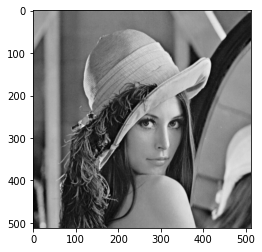

In [214]:
img = cv2.imread("Lenna.png", 0)
print(img.shape)

plt.imshow(img, cmap = "gray")

Apply Fourier Transform

In [215]:
f=np.fft.fft2(img)
f_shift=np.fft.fftshift(f)

Where are we so far

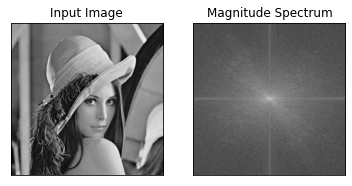

In [216]:
magnitude_spectrum = 20*np.log(np.abs(f_shift))
absmg = abs(magnitude_spectrum)
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(absmg, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

Making a mask for upper and lower bound fourier

In [217]:
bw = 80
rows,cols = img.shape
print(img.shape)
crow,ccol = rows//2,cols//2
drow = rows-bw
dcol = cols-bw
zero = np.zeros((rows,cols))
zero[-drow:drow,-dcol:dcol] = 1
zero[crow-bw:crow+bw,ccol-bw:ccol+bw] = 0

(512, 512)


Apply the mask and obtain result

In [218]:
result = f_shift*zero
magnitude_spectrum_inverse = 20*np.log(np.abs(result))
absmsi =np.abs(magnitude_spectrum_inverse)
i_shift=np.fft.ifftshift(result)
i_f_shift=np.fft.ifft2(result)
res_image=np.abs(i_f_shift)

C:\Users\S_R~1.ALI\AppData\Local\Temp/ipykernel_12012/3882781287.py:2: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum_inverse = 20*np.log(np.abs(result))


Results

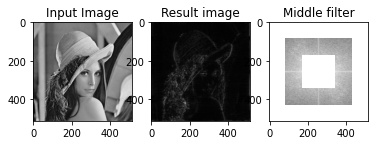

In [219]:
plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image')
plt.subplot(132),plt.imshow(res_image, cmap = 'gray')
plt.title('Result image')
plt.subplot(133),plt.imshow(absmsi, cmap = 'gray')
plt.title('Middle filter')
plt.show()